<a href="https://colab.research.google.com/github/EHOVITAUM/Vector_Databases_Image_Models/blob/main/LLM_VDB_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
!faiss-cpu
#!git clone https://github.com/leslliesayrus/owshq_vector_databases_llm.git
!pip install --upgrade pip
!pip install faiss-cpu
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import faiss
import os

/bin/bash: line 1: faiss-cpu: command not found


In [160]:
folder_photos = '/content/drive/MyDrive/imagens'

In [161]:
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

In [162]:
images = []
embeddings = []

for indexxx, i in enumerate(os.listdir(folder_photos)):
    print(f"Índice {indexxx}: {i}")

    image_path = f'{folder_photos}/{i}'
    image = Image.open(image_path)
    images.append(image)
    image = preprocess(image)
    image = image.unsqueeze(0)  # adiciona uma dimensão para criar um lote

    # executa a imagem através do modelo ResNet

    with torch.no_grad():
        embedding = resnet_model(image)
        embeddings.append(embedding)


Índice 0: cao1.jfif
Índice 1: cao2.jfif
Índice 2: cao3.jfif
Índice 3: cao4.jfif
Índice 4: cao5.jfif
Índice 5: gato1.jfif
Índice 6: gato2.jfif
Índice 7: cao6.jpg
Índice 8: aviao1.jfif
Índice 9: aviao2.jfif
Índice 10: cao7.webp
Índice 11: aviao3.jpg
Índice 12: gatoXonca.jpg
Índice 13: onca.jpg
Índice 14: aviao4.jpg
Índice 15: japonesa1.jpg
Índice 16: japonesa2.jpg
Índice 17: japonesa3.jpg
Índice 18: japones1.jpg
Índice 19: japones2.jpg
Índice 20: japones3.jpg
Índice 21: ruivo1.jpg
Índice 22: ruivo2.jpg
Índice 23: ruivo3.jpg
Índice 24: ruiva1.jpg
Índice 25: ruiva2.jpg
Índice 26: ruiva3.jpg
Índice 27: homem1.jpg
Índice 28: homem2.jpg
Índice 29: homem3.jpg
Índice 30: mulher1.jpg
Índice 31: mulher2.jpg
Índice 32: mulher3.jpg


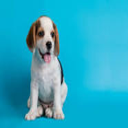

In [163]:
# exibindo qualquer imagem da pasta
images[0].resize((128,128))

In [164]:
print('shape of the embedding', embeddings[0].shape)
print('example: ', embeddings[0][0][0:10])


shape of the embedding torch.Size([1, 1000])
example:  tensor([ 0.1355,  2.2080,  1.3148,  1.5122,  2.5030,  3.6289, -1.2834, -3.3676,
        -2.1252, -4.1238])


In [165]:
#add embeddings into the vector databases
index = faiss.IndexFlatL2(1000)
for i in embeddings:
  index.add(i)

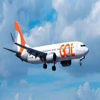

In [166]:
# escolher uma imagem pelo indice
# k é o numero de vizinhos proximos
index_image = 11
k = 4
images[index_image].resize((100,100))

In [167]:
#fazer a busca
distance , indices = index.search(embeddings[index_image],k)

In [168]:
for i in range(len(indices[0])):
  print(f"distance {distance[0][i]}",f"index image: {indices[0][i]}")

distance 0.0 index image: 11
distance 2044.9586181640625 index image: 14
distance 2519.822265625 index image: 9
distance 2934.60205078125 index image: 8


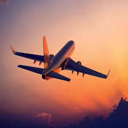

In [169]:
images[indices[0][1]].resize((128,128))

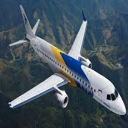

In [170]:
images[indices[0][2]].resize((128,128))

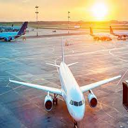

In [171]:
images[indices[0][3]].resize((128,128))